In [1]:
import gensim
from gensim import corpora

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:

file_path = 'msc_final_data_v1.csv'
data = pd.read_csv(file_path)

data.head()

,code,name,course_description,time,tutor_comment,course_name,student_year,Course_Module,year,pandemic,academic_year,Exams
0,STAT20060,Other,Other,2015-02-19 14:36:00,Student was doing a probability question relat...,STAT,2,60,2015,Pre-COVID,2014-2015,No
1,MIS2005L,Basic Statistics,Basic Statistics,2015-02-19 14:57:00,Students were doing a project and needed to ma...,MIS,2,5,2015,Pre-COVID,2014-2015,No
2,MIS2005L,Basic Statistics,Basic Statistics,2015-02-19 14:57:00,Students were doing a project and needed to ma...,MIS,2,5,2015,Pre-COVID,2014-2015,No
3,MIS2005L,Basic Statistics,Basic Statistics,2015-02-19 14:57:00,Students were doing a project and needed to ma...,MIS,2,5,2015,Pre-COVID,2014-2015,No
4,MST10030,Matrices,Matrices,2015-02-19 15:32:00,Student was doing matrices and wanted to know ...,MST,1,30,2015,Pre-COVID,2014-2015,No


In [4]:
def clean_comments(comments):
    docs = [comment for comment in comments.unique() if isinstance(comment, str)]
    docs = [comment for comment in docs if len(comment.split()) > 10]
    return docs

In [5]:
def lemmatize(docs):
    return docs

In [6]:
# Topic modeling parameters
n_topics = 12  # number of topics
n_words = 10   # number of words per topic
n_docs = 5     # number of documents per topic

In [7]:
docs = clean_comments(data['tutor_comment'])
lemmatized_docs = lemmatize(docs)

In [8]:
vectorizer = CountVectorizer(max_df=0.5, min_df=5, max_features=None, token_pattern=r'\b[a-zA-Z]{3,}\b', stop_words='english')
doc_tf_vecs = vectorizer.fit_transform(lemmatized_docs)
doc_tf_words = vectorizer.get_feature_names_out()

# LDA Model
model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0)
model.fit(doc_tf_vecs)
topic_word_distribs = model.components_
doc_topic_distribs = model.transform(doc_tf_vecs)

In [9]:
def topic_words(topic_word_distribs, doc_tf_words, n_words):
    top_words_dic = {}
    for topic_idx, topic_probs in enumerate(topic_word_distribs):
        top_words = [doc_tf_words[i] for i in topic_probs.argsort()[:-n_words-1:-1]]
        top_words_dic[topic_idx] = top_words
    return top_words_dic


In [10]:
def top_ndoc_idxs(n_topics, doc_topic_distribs, n_docs):
    top_docs_dic = {}
    for topic_idx in range(n_topics):
        doc_probs = doc_topic_distribs[:, topic_idx]
        sorted_idxs = np.argsort(doc_probs)[::-1]
        top_docs = sorted_idxs[:n_docs]
        top_docs_dic[topic_idx] = top_docs
    return top_docs_dic

In [11]:
topic_wordsn = topic_words(topic_word_distribs, doc_tf_words, n_words)
top_doc_idxs = top_ndoc_idxs(n_topics, doc_topic_distribs, n_docs)

In [12]:
topics_data = []
for topic_idx in range(n_topics):
    topic_info = {
        'Topic Words': topic_wordsn[topic_idx],
        'Top Comments': [docs[doc_idx] for doc_idx in top_doc_idxs[topic_idx]]
    }
    topics_data.append(topic_info)

topics_data[0]  

{'Topic Words': ['matrix',
  'matrices',
  'numbers',
  'sheet',
  'form',
  'inverse',
  'finding',
  'row',
  'number',
  'roots'],
 'Top Comments': ['Student needed to see how to find the inverse of a matrix using the adjoint method.',
  'Students working on the arithmetic of complex numbers. The main problems were in calculating the modulus where they were forgetting that the square of a negative number is positive.',
  'Student could convert from polar to Cartesian but not from Cartesian to polar',
  'This student was finding the roots of complex numbers and was mostly working with Claire.',
  'how to find the determinant of the cofactor matrix. Unsure of method.']}

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['russian', 'wasn', 'world'] not in stop_words.
  warnings.warn(


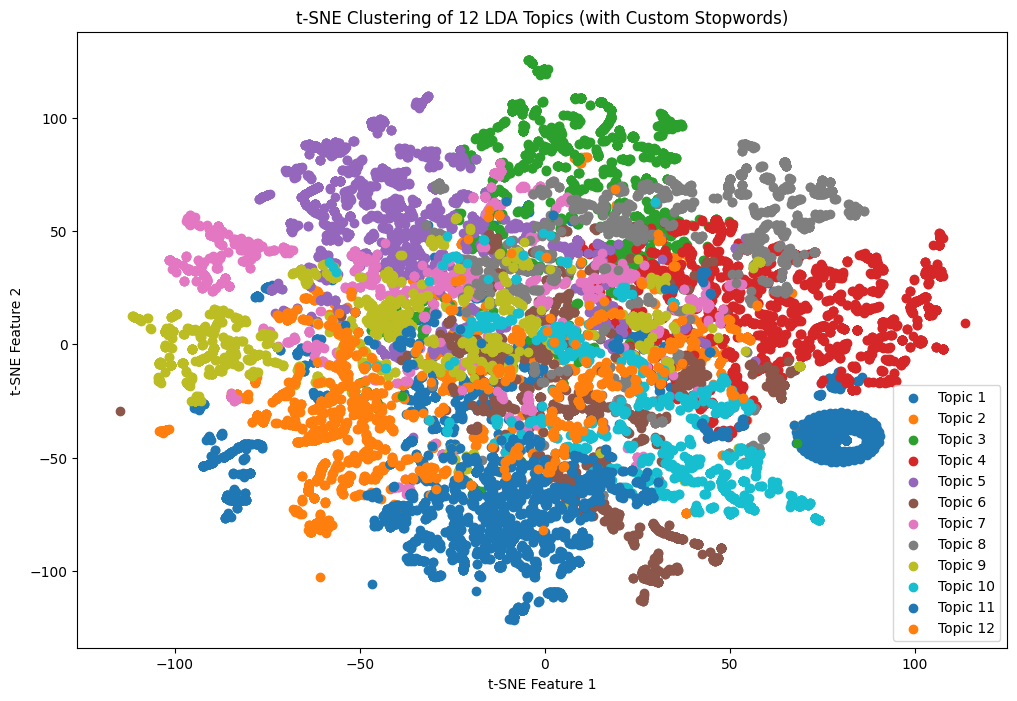

In [15]:


file_path = 'msc_final_data_v1.csv'
data = pd.read_csv(file_path)

def clean_comments(comments):
    docs = [comment for comment in comments.unique() if isinstance(comment, str)]
    docs = [comment for comment in docs if len(comment.split()) > 10]
    return docs

# Lemmatize documents 
def lemmatize(docs):
    return docs

# Topic modeling parameters
n_topics = 12  # number of topics
n_words = 10   # number of words per topic
n_docs = 5     # number of documents per topic

docs = clean_comments(data['tutor_comment'])
lemmatized_docs = lemmatize(docs)

# Define custom stopwords
custom_stopwords = ['ishiwed', 'within', 'emitted', 'analyse', 'love', 'various', 'holds', 'needing', 'texts',
                    'countries', 'fairness', 'mutaully', 'focal', 'earthed', 'pronblem', 'such', 'hall', 'demonstaedt',
                    'road', 'fed', 'showing', 'poisoon', 'hooke', 'pj', 'fully', 'orientation', 'blackbody', 'del',
                    'intermediate', 'microphone', 'firstborn', 'ourselves', 'teased', 'off', 'easily', 'birth',
                    'weight', 'dealt', 'aidan', 'problesm', 'uinsure', 'seventh', 'overpowering', 'scrabble',
                    'submitted', 'water', 'ci', 'money', 'wedges', 'reference', 'thins', 'leaves', 'ving', 'likes',
                    'quantity', 'unmarked', 'difficulting', 'cancelled', 'diverges', 'abbreviations', 'itheata',
                    'stemming', 'sums', 'wll', 'comparitive', 'av', 'gen', 'involving', 'notes', 'were', 'manipulated',
                    'payment', 'reluctant', 'pending', 'appropriately', 'scottish', 'spreadsheet', 'utility', 'truth',
                    'hope', 'feel', 'residue', 'attributes', 'witha', 'convice', 'repo', 'winning', 'movire', 'pitched',
                    'lars', 'repetitions', 'download', 'extension', 'demonstrating', 'arises', 'shown', 'screws',
                    'roll', 'lat', 'recollection', 'qould', 'bonds', 'noticing', 'mised', 'xpalining', 'closed', 'golf',
                    'confsed', 'finind', 'literally', 'sheer', 'goals', 'background', 'somequestions', 'use', 'sitting',
                    'interacting', 'compress', 'similat', 'submitting', 'supplied', 'frowning', 'disproving', 'copied',
                    'elf', 'monday', 'word', 'cords', 'coloured', 'invovling', 'reported', 'appoint', 'pigeonhole',
                    'prompts', 'cran', 'att', 'fisher', 'litre', 'facts', 'rim', 'handwritten', 'thmselves', 'spotted',
                    'address', 'just', 'domain', 'addition', 'fg', 'entire', 'illustrated', 'gate', 'discrepancies',
                    'thn', 'fdr', 'doubt', 'inclusion', 'ask', 'rao', 'sut', 'cold', 'orally', 'remark', 'partially',
                    'firs', 'windows', 'creeping', 'envelops', 'tangential', 'considerably', 'present', 'heuristic',
                    'recreate', 'topping', 'structuring', 'claiming', 'recovered', 'downloading', 'runthrough',
                    'paired', 'constantly', 'rejoined', 'radian', 'extensions', 'questionsm', 'findings', 'householder',
                    'allow', 'combination', 'uaes', 'atoms', 'contained', 'wrongly', 'meany', 'exprerssion', 'eros',
                    'rearrange', 'margins', 'probelem', 'ended', 'exmples', 'incorporate', 'guesthouse', 'wantedto',
                    'tlkaed', 'dissect', 'equaling', 'gone', 'then', 'signed', 'relationships', 'uncertain',
                    'howixontal', 'diffculty', 'ought', 'rally', 'ruffinis', 'mimiced', 'ofd', 'student', 'appears',
                    'uninvertible', 'rewrite', 'afrom', 'explantion', 'plotter', 'implicit', 'hoop', 'practically',
                    'generalised', 'pivots', 'versus', 'has', 'predefined', 'wnated', 'aaproach', 'mccoy', 'functio',
                    'centered', 'multisets', 'porcesses', 'copy', 'perron', 'rrpoblem', 'minimal', 'comput', 'mising',
                    'reached', 'movement', 'moments', 'physical', 'lookup', 'daredevil', 'formally', 'molarity',
                    'nuclear', 'missed', 'while', 'reformulate', 'resistive', 'disguised', 'reasoned', 'surrounding',
                    'lend', 'conductivity', 'geography', 'period', 'holes', 'nominal', 'act', 'everythign', 'afterward',
                    'main', 'mit', 'panic', 'daunted', 'wenth', 'ray', 'reflections', 'recognizing', 'leveraging',
                    'wither', 'black', 'book', 'poker', 'warned', 'favour', 'verity', 'freedom', 'explanation',
                    'underlining', 'accuracy', 'bothered', 'individual', 'answer', 'struggling', 'floating', 'trough',
                    'strain', 'manor', 'cover', 'switched', 'exchange', 'larger', 'beneficial', 'tes', 'improvements',
                    'summarising', 'walked', 'developer', 'truss', 'toss', 'chosen', 'lengthy', 'recent', 'may',
                    'quotes', 'uneven', 'interested', 'havel', 'massaging', 'proper', 'enough', 'papers', 'speeding',
                    'confused', 'actions', 'procedure', 'wednesday', 'blocking', 'helped', 'fuel', 'generalising',
                    'assistance', 'narrow', 'comparatively', 'refer', 'forgot', 'solution', 'namely', 'assistant',
                    'reconstruct', 'sci', 'conducting', 'everything', 'electricity', 'lemon', 'among', 'technically',
                    'delving', 'photograph', 'dont', 'isolates', 'promised', 'patterns', 'comments', 'closely',
                    'agriculture', 'suit', 'crawley', 'visits', 'tripping', 'preferred', 'judgement', 'native',
                    'appreciate', 'complete', 'hard', 'visually', 'volume', 'struggle', 'substance', 'connect',
                    'associates', 'dim', 'thereafter', 'mnemonic', 'load', 'coset', 'theorist', 'although', 'lifted',
                    'synonymous', 'haines', 'nitrogen', 'chess', 'golden', 'trend', 'simplifying', 'expansions',
                    'daily', 'tutro', 'if', 'ruining', 'quizzed', 'online', 'anything', 'asin', 'recommended',
                    'matters', 'eccentricity', 'deeper', 'na', 'stage', 'improvement', 'tooth', 'ago', 'parallels',
                    'uneasy', 'elasticity', 'door', 'strategies', 'principal', 'dec', 'words', 'sampling', 'unknown',
                    'tips', 'Russian', 'outcomes', 'cinema', 'instructor', 'time', 'thorough', 'impacts', 'queue',
                    'touch', 'health', 'upper', 'constraints', 'affect', 'treating', 'wordings', 'constrained',
                    'radiation', 'educated', 'persisted', 'treadmill', 'https', 'averaging', 'nexted', 'title',
                    'happier', 'introducing', 'paste', 'studnt', 'dudy', 'wikipedia', 'dominoes', 'width', 'exhaust',
                    'question', 'realises', 'fullest', 'von', 'crossed', 'completion', 'coming', 'ripe', 'binding',
                    'dr', 'fundamentals', 'joints', 'cents', 'rejected', 'encouraging', 'prefer', 'partly', 'towards',
                    'experimental', 'scratched', 'fleshed', 'human', 'outline', 'against', 'phrased', 'bends', 'lying',
                    'rushing', 'loop', 'operate', 'instructions', 'breakeven', 'risks', 'involved', 'parked', 'hoe',
                    'floor', 'decreased', 'woman', 'rods', 'guiding', 'strings', 'mistook', 'unanswered', 'sprite',
                    'combos', 'produce', 'experimented', 'trackpad', 'mitigate', 'visible', 'attaining', 'scenario',
                    'didn', 'predicting', 'min', 'create', 'exploring', 'install', 'again', 'april', 'updated',
                    'shortened', 'after', 'commuting', 'dir', 'comes', 'overcomplicate', 'application', 'wanteded',
                    'steam', 'theygo', 'ha', 'jet', 'suggestions', 'quinn', 'bounce', 'lm', 'putting', 'sudeent',
                    'slit', 'audio', 'detail', 'resonant', 'marginals', 'reduction', 'commodities',
                    'wantedaomehelpwithqdding', 'graphic', 'phrasing', 'boost', 'mat', 'solce', 'stand', 'sourced',
                    'wrap', 'lowest', 'accounts', 'resembled', 'images', 'spin', 'drew', 'beside', 'stress',
                    'refreshed', 'hydrogen', 'sarp', 'eachother', 'whiteboard', 'repeatedly', 'involvoing', 'accepted',
                    'logs', 'flowcharts', 'teasing', 'outwards', 'choice', 'reviews', 'grades', 'shaped', 'caught',
                    'per', 'practicality', 'cert', 'sufficiently', 'encounter', 'coursnotes', 'improving', 'unseen',
                    'directory', 'answer', 'pst', 'strength', 'wot', 'pdf', 'framed', 'all', 'wondering', 'fen',
                    'outlining', 'indicates', 'ascertain', 'deduced', 'numerous', 'homeostasis', 'bet', 'minor',
                    'directed', 'girls', 'feels', 'google', 'quarters', 'inputing', 'misprint', 'covering',
                    'scheduling', 'interception', 'zigzag', 'concertante', 'perigee', 'the', 'eg', 'hoyrs',
                    'jupyterlab', 'prompt', 'estimated', 'wanetd', 'ucd', 'adjacent', 'exprecting', 'wished',
                    'communicate', 'unpaused', 'hyp', 'very', 'rise', 'cheat', 'diseases', 'finalize', 'assignments',
                    'decays', 'fight', 'senitivity', 'smoothly', 'negate', 'overlapped', 'depreciation', 'accept',
                    'suff', 'shrink', 'assit', 'scores', 'situations', 'often', 'crucial', 'submarine', 'hep',
                    'referenced', 'networks', 'tying', 'aided', 'sentence', 'sketches', 'studentstueent', 'triviality',
                    'ba', 'select', 'experiencing', 'pricing', 'describes', 'tutorwent', 'typical', 'approved', 'wont',
                    'oyu', 'monty', 'communication', 'prep', 'suitable', 'surprised', 'streets', 'overlooked', 'scan',
                    'positve', 'regarded', 'centre', 'curriculum', 'struggles', 'disbns', 'ideally', 'now', 'active',
                    'arose', 'translate', 'claimed', 'disk', 'item', 'cancel', 'consolidate', 'initially', 'big',
                    'letting', 'producer', 'arising', 'generalise', 'string', 'whole', 'wasd', 'magnetic', 'questio',
                    'whisker', 'qnd', 'responsible', 'dad', 'hospital', 'skip', 'constrain', 'ecology', 'constructive',
                    'scale', 'brouwer', 'struglled', 'american', 'iterative', 'stopping', 'reimann', 'sue', 'justify',
                    'specialist', 'scales', 'concentration', 'nuala', 'closure', 'inspection', 'consultant', 'games',
                    'lives', 'biomedical', 'fintervak', 'conjugation', 'reminding', 'selling', 'vitamins', 'zy',
                    'undstanding', 'capture', 'broought', 'disappointed', 'sea', 'pracice', 'comprehension', 'fallacy',
                    'orked', 'carbon', 'facilities', 'consumed', 'canceling', 'outside', 'rev', 'smiling', 'whne',
                    'defective', 'somebody', 'scope', 'exacty', 'dragging', 'meaning', 'predictions', 'limitations',
                    'quantifying', 'waited', 'comfortably', 'selection', 'heads', 'flipped', 'passing', 'stepping',
                    'accustomed', 'excersies', 'desmos', 'behinf', 'depend', 'gifs', 'tough', 'checked', 'mph', 'taked',
                    'mathfit', 'occurring', 'lifting', 'trees', 'ynsure', 'wires', 'bias', 'joined', 'atmospheric',
                    'uses', 'forces', 'accelerating', 'wrong', 'relavent', 'typographic', 'sole', 'sequential',
                    'animated', 'primary', 'behaves', 'write', 'abilities', 'trick', 'efforts', 'shower', 'bigger',
                    'file', 'generation', 'benefited', 'digit', 'fish', 'examined', 'recurrence', 'arise', 'revenue',
                    'industry', 'reflect', 'sugested', 'envelopes', 'sliding', 'boxes', 'label', 'assistanc', 'thier',
                    'weekly', 'supposed', 'build', 'simplify', 'draw', 'excel', 'son', 'guideline', 'plausible',
                    'thomas', 'repeat', 'stuent', 'dog', 'starred', 'anxiety', 'supervision', 'events', 'provide',
                    'strata', 'aware', 'goven', 'long', 'rare', 'reconnect', 'tau', 'acknowledged', 'wamtedaome',
                    'test', 'weak', 'gaelic', 'control', 'separating', 'players', 'clashed', 'tree', 'hing', 'borrow',
                    'quicker', 'breakdown', 'weird', 'trila', 'restricted', 'predicted', 'false', 'coulomb',
                    'photocopied', 'earnngs', 'wrapped', 'cell', 'ml', 'not', 'gurpreet', 'disquise', 'massive',
                    'exhibiting', 'opposed', 'name', 'investment', 'heir', 'coated', 'blood', 'acted', 'companies',
                    'life', 'formalities', 'determine', 'biased', 'somewhere', 'official', 'opening', 'documents',
                    'implementing', 'mile', 'unconfident', 'oof', 'queried', 'union', 'gun', 'hands', 'hawthorne',
                    'eom', 'rigid', 'considerable', 'motorways', 'remaining', 'studetn', 'honest', 'operates',
                    'respect', 'individually', 'rss', 'bars', 'columns', 'thermodynamics', 'forward', 'days', 'fusion',
                    'bolster', 'occupied', 'fussy', 'term', 'equipped', 'understandable', 'investments', 'queued',
                    'lifespan', 'commute', 'superfluous', 'past', 'directions', 'cowyears', 'had', 'distances',
                    'untrained', 'latitude', 'lost', 'projectile', 'terminology', 'hopes', 'manufacturing', 'visa',
                    'importing', 'laptop', 'characters', 'filters', 'helps', 'alt', 'entered', 'luckily', 'combine',
                    'transition', 'mac', 'digest', 'foundations', 'counterexample', 'obstacles', 'offer', 'secure',
                    'next', 'opposites', 'aligned', 'desktop', 'given', 'tutors', 'studemt', 'desk', 'even', 'greater',
                    'wacc', 'enquired', 'firslty', 'gene', 'areas', 'generators', 'arrive', 'leave', 'anti', 'like',
                    'loops', 'assurance', 'motivation', 'inc', 'fear', 'relayed', 'distance', 'conversation', 'doingn',
                    'remedial', 'dip', 'reals', 'troubleshooted', 'helpthem', 'sign', 'pause', 'withthem', 'check',
                    'ae', 'limited', 'circular', 'labs', 'mature', 'later', 'upwards', 'exposing', 'doin', 'balls',
                    'fibonacci', 'engaged', 'stayed', 'academy', 'chains', 'factually', 'variables', 'belongs',
                    'ellipses', 'insides', 'hw', 'develop', 'percent', 'graphable', 'exhaustive', 'suggesting', 'mates',
                    'illustration', 'edge', 'collision', 'versions', 'eft', 'going', 'wage', 'modified', 'mainly',
                    'assumptions', 'specialises', 'eurostat', 'ourt', 'for', 'questions', 'checklist', 'creates',
                    'exerting', 'deviations', 'oscillation', 'realise', 'crying', 'verification', 'normal', 'lingo',
                    'automatically', 'plant', 'crosses', 'bernstein', 'cube', 'thornton', 'laid', 'astronaut', 'they',
                    'stuck', 'uw', 'wise', 'en', 'latter', 'unrealistically', 'ready', 'contradiction', 'capacity',
                    'charity', 'mathematic', 'diagnostic', 'encouraged', 'join', 'maglev', 'pinpoint', 'award',
                    'characterization', 'cyclist', 'cetera', 'standardizing', 'downward', 'classifieds', 'approach',
                    'tidied', 'alternate', 'browse', 'checking', 'hung', 'ways', 'sued', 'def', 'upon', 'enormously',
                    'exploited', 'duration', 'somewhere', 'demonstrators', 'lever', 'lecturer', 'videos', 'filtering',
                    'buoyancy', 'subs', 'computing', 'carried', 'questions', 'work', 'cssc', 'their', 'london',
                    'coverse', 'students', 'sharing', 'significance', 'booked', 'clarification', 'helpful', 'swapping',
                    'oscillator', 'erroneous', 'spheres', 'bring', 'smallest', 'taught', 'donning', 'sat', 'changes',
                    'scratch', 'acc', 'several', 'actor', 'contradicting', 'planning', 'cars', 'explained', 'grasping',
                    'ax', 'generated', 'invert', 'ropey', 'projecting', 'since', 'cleaner', 'silly', 'band', 'random',
                    'script', 'displaced', 'pop', 'geo', 'at', 'tasked', 'hup', 'indicator', 'continuing', 'pencils',
                    'determines', 'donation', 'identity', 'exclusion', 'separable', 'proofs', 'queries', 'links',
                    'delighted', 'neatly', 'sinusoidal', 'convenient', 'rotating', 'continuously', 'inertia',
                    'reducing', 'formatting', 'nudged', 'confused', 'card', 'predict', 'process', 'chambers',
                    'transmission', 'compatibility', 'evaluate', 'channel', 'comparing', 'classic', 'person',
                    'consulting', 'commonly', 'referring', 'understand', 'themselves', 'accompanying', 'mulling',
                    'exposure', 'interpretation', 'drawings', 'simplified', 'compose', 'struggled', 'names',
                    'hesitated', 'statement', 'isolating', 'overlap', 'invective', 'lane', 'implement', 'dependant',
                    'navigation', 'pend', 'mole', 'decks', 'vary', 'mouse', 'nod', 'whether', 'seemingly', 'forgotten',
                    'surplus', 'understanding', 'lots', 'slipping', 'yielded', 'unconclusive', 'avail', 'operated',
                    'uploading', 'freefalling', 'labeling', 'space', 'cis', 'emphasizing', 'reservoir', 'every',
                    'meter', 'falls', 'rejecting', 'don', 'receive', 'probl', 'version', 'steadily', 'classify',
                    'cakes', 'advance', 'featured', 'different', 'biv', 'showed', 'construct', 'beyond', 'practised',
                    'clashing', 'resistor', 'christmas', 'budget', 'theres', 'views', 'paint', 'normally', 'orderings',
                    'randomly', 'view', 'survey', 'flying', 'measured', 'who', 'lse', 'function', 'candidates',
                    'accent', 'methodical', 'investigated', 'user', 'speakers', 'bedrooms', 'pipe', 'rainwater',
                    'sides', 'could', 'confusions', 'flow', 'people', 'input', 'happ', 'brown', 'yet', 'padraic',
                    'rues', 'demonic', 'paulis', 'howe', 'unclassified', 'reassure', 'blinded', 'cease',
                    'functionality', 'sliced', 'your', 'car', 'plans', 'interaction', 'pure', 'prevented', 'revisit',
                    'clarification', 'suspecting', 'courses', 'smaller', 'jack', 'relation', 'naming', 'troubling',
                    'disproportionate', 'friction', 'gritty', 'entitled', 'studet', 'enda', 'let', 'stopped', 'yes',
                    'arehappy', 'assuming', 'eventually', 'lent', 'rope', 'boys', 'pollution', 'require', 'selves',
                    'dropping', 'neglected', 'deep', 'init', 'con', 'future', 'wealth', 'poorly', 'optional', 'profit',
                    'inifinty', 'depends', 'aim', 'eliminate', 'bills', 'led', 'retina', 'country', 'features',
                    'bringing', 'specimen', 'recognition', 'cal', 'consultations', 'fina', 'ferris', 'shift',
                    'sickness', 'program', 'anywhere', 'affects', 'bewteen', 'henebry', 'levels', 'simplistic', 'cash',
                    'drastically', 'ours', 'besides', 'chicken', 'experimenting', 'anyone', 'deck', 'bar', 'gradually',
                    'frequently', 'o', 'extra', 'confuse', 'forum', 'prompting', 'doubted', 'tricks', 'slicing',
                    'googling', 'gravity', 'mixes', 'discriminate', 'valued', 'circumstances', 'ration', 'surface',
                    'imagine', 'war', 'foreign', 'caps', 'worry', 'cater', 'draws', 'previous', 'emailing', 'wnet',
                    'structure', 'formed', 'pong', 'express', 'emit', 'engagement', 'error', 'operational',
                    'conclusion', 'locate', 'similar', 'packages', 'lie', 'merely', 'hidden', 'hos', 'cola', 'cliff',
                    'flat', 'impossible', 'lacking', 'please', 'cool', 'complaining', 'os', 'iron', 'bulb', 'up', 'gel',
                    'ill', 'progressing', 'utilize', 'pic', 'finishes', 'ma', 'dice', 'coded', 'plug', 'alarm',
                    'particle', 'bogged', 'messing', 'better', 'excercises', 'throughsome', 'sand', 'sheet', 'slight',
                    'builder', 'hiatus', 'bother', 'beginner', 'internet', 'begins', 'laborious', 'cost', 'golfer',
                    'basketball', 'ib', 'bunny', 'difficulty', 'sero', 'subsequences', 'conclusions', 'pdfs',
                    'variance', 'function', 'xe', 'animals', 'http', 'two', 'valid', 'proposed', 'slips', 'river',
                    'asking', 'needless', 'fpt', 'ph', 'decomposed', 'intakes', 'college', 'unearth', 'presence',
                    'intercept', 'error', 'team', 'hesitant', 'sub', 'dominated', 'might', 'independently', 'katies',
                    'lecture', 'invent', 'needed', 'rotatory', 'answer', 'proficient', 'divisor', 'plain', 'intuition',
                    'decrease', 'break', 'tether', 'grad', 'horizontal', 'sounds', 'drawer', 'methods', 'requisite',
                    'shapes', 'querying', 'timetable', 'deconstructed', 'discounting', 'boundary', 'cells', 'four',
                    'noting', 'sluggish', 'meant', 'viva', 'rod', 'contradicted', 'coriolis', 'considerations',
                    'tutoring', 'bonus', 'micrograms', 'fact', 'abrupt', 'near', 'explaining', 'simplifying',
                    'spanning', 'adequate', 'statistics', 'efficiently', 'some', 'according', 'trickiest', 'completing',
                    'lambdas', 'iii', 'follows', 'wasnt', 'pigeon', 'yields', 'own', 'tweaks', 'teaching', 'answer',
                    'subjective', 'inductive', 'distinct', 'approximate', 'fluency', 'pressures', 'arguably', 'chapter',
                    'help', 'possible', 'endpoint', 'calculator', 'already', 'earths', 'apprehensive', 'friend',
                    'aside', 'stays', 'mixing', 'extending', 'webpage', 'schwartz', 'iterations', 'slines', 'raw',
                    'upward', 'semester', 'conducted', 'cm', 'boils', 'du', 'segment', 'zero', 'decay', 'gist', 'reset',
                    'question', 'game', 'biggest', 'save', 'isotonic', 'sketched', 'inflexion', 'providing', 'watts',
                    'manual', 'comprised', 'months', 'snd', 'examining', 'experiment', 'implied', 'lock',
                    'accelerations', 'equate', 'enlighten', 'domain', 'propagating', 'seriously', 'verify', 'pacman',
                    'poor', 'detectors', 'reflected', 'taxi', 'faces', 'john', 'summation', 'separation', 'guided',
                    'installments', 'sourcetree', 'raphson', 'liked', 'sleigh', 'warmed', 'beams', 'actuarial',
                    'unnecessary', 'escaping', 'ease', 'specificity', 'above', 'nicer', 'patience', 'spoken', 'bow',
                    'prob', 'compton', 'pay', 'others', 'constant', 'systematically', 'experienced', 'wait', 'reducing',
                    'emphasized', 'dash', 'heading', 'unpolarised', 'confirmations', 'derangements', 'unfortunately',
                    'overly', 'overload', 'fae', 'allowing', 'either', 'tanh', 'trimester', 'heated', 'navigating',
                    'stamens', 'generality', 'shop', 'pens', 'dominant', 'foundation', 'ensure', 'investigation',
                    'expected', 'assessed', 'cooperative', 'restrictions', 'lacked', 'couldnt', 'sick', 'found',
                    'manual', 'opinion', 'inquire', 'accessible', 'apple', 'txt', 'subjects', 'ilk', 'described',
                    'info', 'consisted', 'donated', 'become', 'nest', 'ww', 'reviewing', 'set', 'occasionally', 'minds',
                    'altered', 'accidental', 'rectify', 'wre', 'tidying', 'bt', 'personal', 'recollected', 'picking',
                    'successful', 'dubious', 'uranium', 'approach', 'you', 'got', 'minly', 'approximately', 'classes',
                    'applicable', 'passenger', 'based', 'corner', 'matter', 'scuba', 'laptops', 'observation',
                    'minutes', 'values', 'financial', 'over', 'expert', 'symbolise', 'vacuum', 'striking', 'throw',
                    'radiant', 'comprehend', 'havinga', 'appear', 'impression', 'weeks', 'engineer', 'ecosystem',
                    'gather', 'block', 'elsewhere', 'symbols', 'dot', 'bipolar', 'muddling', 'questioned', 'suited',
                    'bull', 'compressed', 'kinds', 'sov', 'centroid', 'getting', 'knwo', 'stop', 'short', 'primes',
                    'managed', 'breaking', 'optimistic', 'mix', 'offers', 'letter', 'branches', 'understand', 'somne',
                    'translated', 'longevity', 'face', 'each', 'sever', 'generally', 'reform', 'crate', 'he', 'doesnt',
                    'himself', 'customers', 'nah', 'members', 'point', 'pace', 'baseball', 'bright', 'particular',
                    'eliminating', 'bike', 'entering', 'cycles', 'instead', 'excess', 'attend', 'electronics',
                    'variate', 'guaranteeing', 'anxious', 'percentages', 'weekend', 'electro', 'divide', 'represent',
                    'settings', 'spirals', 'many', 'momentums', 'grew', 'website', 'private', 'starting', 'slower',
                    'theories', 'worst', 'medicines', 'app', 'whom', 'face', 'writes', 'attached', 'opposite',
                    'failure', 'shows', 'sweat', 'behave', 'property', 'illuminate', 'keenly', 'cane', 'yahoo', 'codes',
                    'doubts', 'years', 'averages', 'uncommon', 'gives', 'nice', 'increased', 'latent', 'traveled',
                    'store', 'counterexample', 'mechanical', 'building', 'supporting', 'sent', 'knows', 'succeeded',
                    'ib', 'bunny', 'difficulty', 'sero', 'subsequences', 'conclusions', 'pdfs', 'variance', 'function',
                    'xe', 'animals', 'http', 'two', 'valid', 'proposed', 'slips', 'river', 'asking', 'needless', 'fpt',
                    'ph', 'decomposed', 'intakes', 'college', 'unearth', 'presence', 'intercept', 'error', 'team',
                    'hesitant', 'sub', 'dominated', 'might', 'independently', 'katies', 'lecture', 'invent', 'needed',
                    'rotatory', 'answer', 'proficient', 'divisor', 'plain', 'intuition', 'decrease', 'break', 'tether',
                    'logarithm', 'grad', 'horizontal', 'sounds', 'drawer', 'methods', 'requisite', 'shapes', 'querying',
                    'timetable', 'deconstructed', 'discounting', 'boundary', 'cells', 'four', 'noting', 'sluggish',
                    'meant', 'viva', 'rod', 'contradicted', 'coriolis', 'considerations', 'tutoring', 'bonus',
                    'micrograms', 'fact', 'abrupt', 'near', 'explaining', 'simplifying', 'spanning', 'adequate',
                    'efficiently', 'some', 'according', 'trickiest', 'completing', 'lambdas', 'iii', 'follows',
                    "wasn't", 'pigeon', 'yields', 'own', 'tweaks', 'teaching', 'answer', 'subjective', 'inductive',
                    'distinct', 'approximate', 'fluency', 'pressures', 'arguably', 'chapter', 'help', 'possible',
                    'endpoint', 'calculator', 'already', "earth's", 'apprehensive', 'friend', 'aside', 'stays',
                    'mixing', 'extending', 'webpage', 'schwartz', 'iterations', 'slines', 'raw', 'upward', 'semester',
                    'conducted', 'cm', 'boils', 'du', 'segment', 'zero', 'decay', 'gist', 'reset', 'question', 'game',
                    'biggest', 'save', 'fuller', 'isotonic', 'sketched', 'inflexion', 'providing', 'watts', 'manual',
                    'comprised', 'months', 'snd', 'optimizing', 'examining', 'experiment', 'implied', 'lock',
                    'accelerations', 'equate', 'enlighten', 'domain', 'propagating', 'seriously', 'verify', 'pacman',
                    'poor', 'detectors', 'reflected', 'taxi', 'faces', 'john', 'summation', 'separation', 'guided',
                    'installments', 'sourcetree', 'liked', 'sleigh', 'warmed', 'beams', 'actuarial', 'unnecessary',
                    'escaping', 'ease', 'specificity', 'above', 'nicer', 'patience', 'spoken', 'bow', 'prob', 'compton',
                    'pay', 'others', 'constant', 'systematically', 'experienced', 'wait', 'reducing', 'emphasized',
                    'dash', 'heading', 'unpolarised', 'confirmations', 'derangements', 'unfortunately', 'overly',
                    'overload', 'fae', 'allowing', 'either', 'tanh', 'trimester', 'heated', 'navigating', 'stamens',
                    'rn', 'vdu', 'cov', 'via', 'though', 'terminates', 'played', 'finer', 'observations', 'rectifying',
                    'spectrum', 'sss', 'severely', 'sets', 'figurig', 'dev', 'notaina', 'simultaneously', 'append',
                    'typed', 'inputed', 'underwtamd', 'shetching', 'youtube', 'hestitant', 'speaking', 'provo',
                    'earnings', 'helping', 'spring', 'misleadingly', 'mountain', 'charges', 'preparibg', 'season',
                    'mann', 'heavier', 'succintly', 'grow', 'prone', 'permissible', 'notably', 'listened', 'behaviour',
                    'telling', 'exactly', 'cuold', 'essential', 'ordinary', 'capabilities', 'because', 'calling',
                    'philip', 'opposing', 'profits', 'bays', 'mindful', 'approached', 'dragon', 'examine', 'pulling',
                    'satisfactory', 'pr', 'devised', 'vidioes', 'thursday', 'options', 'proove', 'arangements',
                    'canjcel', 'fitted', 'bases', 'skipping', 'ot', 'visualization', 'right', 'gases', 'pentagon',
                    'rounding', 'denote', 'understating', 'stab', 'ws', 'files', 'reader', 'mentioned', 'none', 'bus',
                    'bedroom', 'millions', 'quarter', 'pitfall', 'moving', 'exclusivity', 'climbing', 'interactions',
                    'peeling', 'radicals', 'exam', 'needed', 'brain', 'defies', 'walk', 'belonged', 'abstraction',
                    'interesting', 'generator', 'wokred', 'litres', 'separator', 'generates', 'noise', 'implication',
                    'equalities', 'seems', 'keen', 'antiderivstives', 'law', 'wjicj', 'definitely', 'created',
                    'becuase', 'mistake', 'execercises', 'spade', 'link', 'ran', 'preamble', 'need', 'gasses',
                    'sources', 'discussing', 'ops', 'ordrr', 'solns', 'pick', 'bog', 'success', 'easy', 'csv',
                    'productivity', 'writting', 'uusing', 'ramp', 'brackets', 'contraction', 'tax', 'evaporation',
                    'places', 'colouring', 'checks', 'locating', 'ternary', 'gave', 'recurring', 'hpat', 'wouldnt',
                    'lightning', 'find', 'visited', 'slonr', 'caqn', 'discussedt', 'pages', 'class', 'complete',
                    'inputs', 'layout', 'tonight', 'categorising', 'moved', 'wantd', 'afterwards', 'troubleshoot',
                    'ends', 'marion', 'double', 'conductor', 'regard', 'fiestel', 'congruence', 'start', 'tomorrow',
                    'corrected', 'took', 'jupyter', 'subsets', 'sage', 'throughout', 'ignoring', 'conservation',
                    'credible', 'origonal', 'mid', 'implementation', 'validation', 'convince', 'walls', 'followed',
                    'removing', 'firework', 'energy', 'hat', 'extremely', 'printing', 'accord', 'jest', 'sesh',
                    'report', 'make', 'okayed', 'quantum', 'certainly', 'framework', 'setup', 'rounded', 'countability',
                    'inspecting', 'self', 'frameworks', 'originated', 'dyspraxia', 'revealed', 'perpendicularly',
                    'passive', 'land', 'mullen', 'lies', 'trial', 'photo', 'vi', 'empirical', 'excited', 'atempt',
                    'valency', 'nd', 'separation', 'straightforward', 'interchange', 'conference', 'ugly',
                    'subsequently', 'neville', 'nightmare', 'round', 'approaches', 'extent', 'schematically', 'nos',
                    'equator', 'lower', 'runtime', 'isolate', 'n', 'ping', 'hear', 'curation', 'general', 'quietly',
                    'criterions', 'j', 'currency', 'made', 'characterising', 'touching', 'preface', 'incident', "using"
                                                                                                                'span',
                    'web', 'cannon', 'thank', 'cod', 'asses', 'mantras', 'sector', 'wth', 'concerns', 'consequence',
                    'recently', 'insert', 'visit', 'habit', 'could', 'envision', 'friends', 'children', 'obligations',
                    'disregard', 'example', 'spss', 'mention', 'knowing', 'principles', 'confidence', 'lsd', 'tcd',
                    'physically', 'characteristics', 'tbh', 'copies', 'blank', 'reasonably', 'mice', 'jobs', 'wishing',
                    'fluid', 'usage', 'purpose', 'unpack', 'leveraged', 'affected', 'have', 'air', 'conjugal', 'hf',
                    'kernel', 'open', 'posing', 'visualisations', 'roughly', 'tiled', 'concluding', 'nowhere', 'away',
                    'ohm', 'strict', 'confidentiality', 'gained', 'update', 'loose', 'full', 'through', 'froglets',
                    'singular', 'frame', 'manipulating', 'infectivity', 'restaurants', 'accorded', 'job', 'separated',
                    'gof', 'clue', 'resistances', 'would', 'intake', 'uninstalling', 'bearing', 'uncomfortable', 'etc',
                    'donate', 'inquiries', 'consumption', 'system', 'components', 'stated', 'trouble', 'insight',
                    'thanked', 'detailing', 'converted', 'goodness', 'furthermore', 'specifically', 'successfully',
                    'create', 'fv', 'questioning', 'luminosity', 'brute', 'stood', 'given', 'amplifier', 'schmidt',
                    'stressing', 'lied', 'ncst', 'difference', 'hi', 'twitch', 'photon', 'parameters', 'items', 'phi',
                    'computationally', 'conceptually', 'aims', 'fd', 'instantaneous', 'canal', 'large', 'ammeters',
                    'the student', 'know', 'alternating', 'probility', 'conditions', 'safety', 'drill', 'allowable',
                    'molar', 'code', 'splits', 'banding', 'braur', 'informs', 'european', 'considered', 'diff',
                    'biostatistics', 'quantitates', 'less', 'dollar', 'subtle', 'too', 'revising', 'recommending',
                    'reckoned', 'implement', 'whatsoever', 'examples', 'doable', 'reconfirmed', 'ruling', 'valuing',
                    'she', 'requested', 'bat', 'virtual', 'analyze', 'responses', 'add', 'collect', 'contributions',
                    'originally', 'lotus', 'approaching', 'referring', 'ranging', 'poi', 'distributed', 'finish',
                    'fail', 'satisfies', 'searches', 'repository', 'piece', 'cancellation', 'forgets', 'elementary',
                    'compounded', 'traveling', 'equivalent', 'education', 'wiring', 'beginning', 'ongoing',
                    'reductions', 'descriptions', 'milli', 'khan', 'routes', 'till', 'signified', 'similarity',
                    'how to', 'expectation', 'eggs', 'stokes', 'figure', 'technique', 'enabled', 'resilience',
                    'argument', 'question', 'show', 'interplay', 'lasted', 'revisiting', 'notion', 'biases',
                    'depending', 'sized', 'balanced', 'high', 'vapor', 'annotate', 'outward', 'rays', 'mistaking',
                    'converged', 'techniques', 'states', 'statistically', 'tops', 'analytic', 'recommendation', 'alike',
                    'latest', 'whirl', 'versa', 'questions', 'neyman', 'loving', 'threw', 'example', 'harder',
                    'discusses', 'finding', 'powerful', 'estimating', 'linking', 'consecutive', 'parse', 'pigeonhole',
                    'enter', 'saved', 'aixi', 'stipulations', 'duty', 'pharmacology', 'knowledge', 'syntax', 'wordy',
                    'diagnose', 'small', 'located', 'lecture', 'rerun', 'entirely', 'consistent', 'entertained',
                    'creating', 'watched', 'finding', 'nowhere', 'mental', 'proceed', 'wonderful', 'adapt', 'been',
                    'evaluate', 'cork', 'understanding', 'maximizing', 'reflecting', 'tie', 'received', 'length',
                    'expo', 'relationship', 'module', 'basically', 'business', 'fake', 'compass', 'major', 'teams',
                    'unfamiliar', 'young', 'transitioning', 'recognizing', 'therms', 'ascent', 'overthinking', 'hold',
                    'contain', 'bacteria', 'reviewed', 'steps', 'planck', 'helix', 'decode', 'downwards', 'temperature',
                    'costs', 'due', 'extremize', 'laser', 'analytical', 'through', 'halfway', 'run', 'step', 'type',
                    'help', 'lengths', 'heights', 'identified', 'pitfalls', 'coronary', 'us', 'regarding', 'manage',
                    'physiotherapy', 'failing', 'consulted', 'remembering', 'firing', 'objects', 'troubleshooting',
                    'march', 'fog', 'idle', 'repayment', 'spite', 'miriam', 'notation', 'practicing', 'organized',
                    'predicators', 'closed', 'subtract', 'dart', 'resultant', 'things', 'keys', 'integrating',
                    'expressed', 'scheme', 'alternative', 'phrases', 'apartments', 'intuitive', 'supply', 'editor',
                    'paragraphs', 'labeled', 'legendre', 'tiny', 'uniquely', 'dive', 'sometimes', 'stores', 'textbook',
                    'mutant', 'explaining', 'hanging', 'pigeonhole', 'hill', 'loss', 'perhaps', 'misuse', 'generalize',
                    'board', 'neutral', 'explicit', 'timeslot', 'familiarize', 'struggling', 'compare', 'accidentally',
                    'apparently', 'interpreting', 'miss', 'marking', 'purely', 'pile', 'joining', 'clicked', 'believed',
                    'mic', 'shorthand', 'resnick', 'memory', 'named', 'continue', 'wasnt', 'extrapolated',
                    'misinterpreted', 'logical', 'tuesday', 'spare', 'ahold', 'increment', 'his', 'trip', 'lacks',
                    'wide', 'compared', 'overcome', 'misinterpreted', 'inventory', 'screenshot', 'written', 'twenty',
                    'deadline', 'discovered', 'liner', 'wages', 'approach', 'females', 'delayed', 'deconstruct',
                    'systematic', 'outer', 'omit', 'normal', 'lectures', 'direction', 'oft', 'aboput', 'cited',
                    'arrest', 'expand', 'pen', 'happening', 'op', 'conclude', 'inability', 'clicking', 'displayed',
                    'reattempt', 'tehn', 'replace', 'disappointing', 'enquire', 'passes', 'lifts', 'pair', 'handout',
                    'gets', 'pass', 'docked', 'inotes', 'litle', 'sur', 'v', 'ideals', 'supposedly', 'riffing',
                    'euclid', 'clarify', 'enclosed', 'clearing', 'stuck', 'mass', 'roles', 'moment', 'pipettes',
                    'redefine', 'underconfident', 'primitive', 'q', 'ungraded', 'boot', 'empty', 'content', 'insecure',
                    'bookings', 'accounted', 'architecture', 'remediation', 'consideration', 'boiled', 'rest', 'points',
                    'gross', 'obtains', 'material', 'curve', 'question', 'assessment', 'mimics', 'increases', 'ensured',
                    'expressions', 'speeds', 'compatible', 'subsequent', 'following', 'height', 'eric', 'observers',
                    'streamline', 'survival', 'abelian', 'action', 'object', 'value', 'relates', 'contact', 'base',
                    'numbered', 'reinstalling', 'dealing', 'additional', 'acquitted', 'beam', 'balding', 'tripped',
                    'smooth', 'surpassed', 'clown', 'enquiring', 'computer', 'ahead', 'sudent', 'mistakingly', 'wind',
                    'eight', 'themselvrs', 'marbles', 'circumstance', 'lotto', 'english', 'literature', 'outlines',
                    'repeated', 'eager', 'confused', 'jupiter', 'package', 'schemes', 'significant', 'tended', 'confid',
                    'turned', 'receptiveness', 'ow', 'forgotten', 'trek', 'autonomy', 'allocation', 'straight',
                    'slipped', 'net', 'dividend', 'spoon', 'mortgage', 'surprisingly', 'reattempting', 'photons', 'tow',
                    'cleared', 'asset', 'reasoning', 'translation', 'when', 'algorithms', 'newspaper', 'becoming',
                    'reread', 'ambiguous', 'anticlockwise', 'explian', 'gaining', 'tuutor', 'lived', 'shares', 'teo',
                    'meaningless', 'adaptation', 'satisfy', 'neymann', 'launching', 'magnetism', 'rough', 'staff',
                    'discounted', 'alwso', 'evidence', 'turning', 'fertiliser', 'glued', 'const', 'pleased', 'altering',
                    'wantes', 'tolls', 'dead', 'couloured', 'wonder', 'frames', 'ingredients', 'chargers', 'throne',
                    'keeping', 'studying', 'batch', 'picture', 'labelled', 'teach', 'read', 'phrase', 'worded', 'pool',
                    'until', 'hour', 'situation', 'one', 'scenarios', 'products', 'happily', 'indexes', 'print',
                    'economy', 'single', 'contextualize', 'similarly', 'filled', 'regionon', 'regions', 'pn',
                    'wavefunctions', 'scenario', 'vitimins', 'considering', 'emphasizing', 'hitting', 'radiates',
                    'seeking', 'tell', 'buoyant', 'registering', 'research', 'operation', 'deliberation', 'observer',
                    'rollercoaster', 'bins', 'irrational', 'real', 'figuring', 'quiet', 'hint', 'corresponding',
                    'deemed', 'looks', 'lift', 'rocket', 'closer', 'leads', 'atom', 'meet', 'metrics', 'starts', 'toy',
                    'bag', 'newtons', 'git', 'bug', 'jumping', 'fired', 'muhammad', 'by', 'drawing', 'attention',
                    'demand', 'those', 'switch', 'lead', 'constants', 'quickly', 'references', 'printed', 'will',
                    'understand', 'euro', 'football', 'receiving', 'supports', 'plc', 'amps', 'explore', 'real-world',
                    'walking', 'miles', 'ice', 'worksheets', 'expanded', 'products', 'considering', 'emphasizing',
                    'indexes', 'radiates', 'print', 'economy', 'seeking', 'tell', 'research', 'bins', 'irrational',
                    'real', 'figuring', 'quiet', 'lift', 'rocket', 'leads', 'atom', 'metrics', 'starts', 'toy', 'bag',
                    'jumping', 'muhammad', 'by', 'drawing', 'attention', 'demand', 'those', 'switch', 'lead', 'quickly',
                    'references', 'printed', 'will', 'understand', 'euro', 'football', 'receiving', 'supports', 'plc',
                    'amps', 'explore', 'real-world', 'walking', 'miles', 'ice', 'worksheets', 'expanded', 'products',
                    'considering', 'emphasizing', 'indexes', 'radiates', 'print', 'economy', 'seeking', 'tell',
                    'research', 'bins', 'irrational', 'real', 'figuring', 'quiet', 'lift', 'rocket', 'leads', 'atom',
                    'metrics', 'starts', 'toy', 'bag', 'jumping', 'muhammad', 'by', 'drawing', 'attention', 'demand',
                    'those', 'switch', 'lead', 'quickly', 'references', 'printed', 'will', 'understand', 'euro',
                    'football', 'receiving', 'supports', 'plc', 'amps', 'explore', 'real-world', 'walking', 'miles',
                    'ice', 'worksheets', 'expanded', 'dynamic', 'open', 'analogy', 'forcing', 'replacements',
                    'substances', 'pieces', 'paid', 'school', 'thens', 'exception', 'guesswork', 'bedding', 'staty',
                    'correct', 'can', 'theyre', 'clearer', 'remains', 'intimidated', 'dropped', 'conflicts',
                    'misconceptions', 'pervious', 'parallel', 'chatted', 'careless', 'describing', 'worrying', 'behind',
                    'weave', 'clipboard', 'shear', 'scientific', 'aka', 'comb', 'addressing', 'born', 'baput', 'static',
                    'tuor', 'navigate', 'assigned', 'betting', 'spoke', 'optimise', 'everyone', 'massively', 'heavily',
                    'issues', 'vo', 'attach', 'half', 'processes', 'opportunity', 'debug', 'coup', 'workig', 'attempts',
                    'katie', 'sine', 'back', 'prodded', 'expanding', 'loan', 'alos', 'undertstand', 'ground', 'forced',
                    'loads', 'hoc', 'great', 'performance', 'visualise', 'player', 'request', 'headlines', 'released',
                    'vis', 'inclusive', 'suddenly', 'biochem', 'hopefully', 'cox', 'norma', 'dissipation', 'either',
                    'themself', 'sandwich', 'corresponded', 'i', 'incorporated', 'invoking', 'arrived', 'waned', 'msc',
                    'oaxob', 'sloppy', 'stata', 'generall', 'styudent', 'macro', 'soil', 'diagrams', 'nor',
                    'complicated', 'independence', 'isolated', 'pretend', 'insects', 'ooked', 'santa', 'pip', 'warm',
                    'meters', 'similer', 'rationald', 'gaps', 'tend', 'colours', 'stars', 'substantially', 'senarios',
                    'meaningful', 'existing', 'stem', 'wanted', 'rms', 'bounced', 'deduct', 'during', 'recover',
                    'editing', 'ah', 'osgood', 'meets', 'pursue', 'crossing', 'remedy', 'negation', 'star', 'corect',
                    'differently', 'brush', 'designed', 'redirected', 'cows', 'rephrased', 'tab', 'factoring', 'marked',
                    'periods', 'assitance', 'finds', 'lack', 'watch', 'asked', 'dietician', 'discontinuous', 'macbook',
                    'applicability', 'graf', 'falling', 'guide', 'enrolled', 'adds', 'wirte', 'quirks', 'be',
                    'performed', 'swap', 'js', 'bayes', 'lob', 'fpf', 'artery', 'regularly', 'bad', 'plus', 'recalling',
                    'walks', 'spits', 'statically', 'drop', 'nm', 'chat', 'xmas', 'data', 'confiedence', 'complaint',
                    'validate', 'degree', 'discussions', 'assignemnt', 'hundred', 'required', 'cumulating',
                    'aopporoach', 'colliding', 'yard', 'environments', 'weather', 'measure', 'answering',
                    'interpretting', 'grows', 'promting', 'simplification', 'rad', 'resources', 'feb', 'slingshot',
                    'database', 'signify', 'removed', 'reactions', 'confirmed', 'visualising', 'advising', 'schwarz',
                    'heard', 'medium', 'unertsand', 'typos', 'eliminated', 'e', 'semilog', 'lecturerw', 'solid', 'tut',
                    'parties', 'appointment', 'dynamical', 'dong', 'arranging', 'aix', 'adressed', 'whre',
                    'microeconomics', 'ticket', 'acceptable', 'nicely', 'fun', 'taboe', 'modelled', 'operators',
                    'othis', 'disabled', 'norton', 'leaving', 'unknowns', 'micro', 'context', 'turn', 'dedicated',
                    'electromagnetism', 'remember', 'yearly', 'jolt', 'wil', 'nan', 'objectives', 'underneath',
                    'current', 'dated', 'note', 'unresolved', 'wroked', 'box', 'arg', 'capability', 'finally',
                    'behavior', 'algorithmic', 'straught', 'extensively', 'bunch', 'bound', 'line', 'growing',
                    'evening', 'requirement', 'login', 'lorentz', 'pandas', 'wish', 'enable', 'possibly', 'lin', 'siny',
                    'immersed', 'wated', 'fomulae', 's', 'refreshers', 'solely', 'bn', 'terms', 'x', 'sruggling',
                    'makeshift', 'give', 'about', 'duagram', 'intended', 'ewbwork', 'lokked', 'bx', 'partial',
                    'resourced', 'tutuor', 'bxa', 'company', 'phase', 'underwent', 'reflective', 'acquire', 'byron',
                    'staying', 'varies', 'annual', 'roatting', 'cons', 'guesses', 'cesar', 'ability', 'breaks',
                    'proguct', 'weas', 'swaps', 'interact', 'aline', 'throwing', 'tighten', 'undertermined',
                    'tinkering', 'legs', 'missread', 'categories', 'havbe', 'naser', 'guessing', 'todays', 'srt',
                    'irrevenlences', 'scheduled', 'farmer', 'pulleys', 'dissimilarity', 'reef', 'unproven', 'cam',
                    'fly', 'skiing', 'ties', 'quantitive', 'tried', 'agreeing', 'fiend', 'ths', 'impacted', 'gathering',
                    'belonging', 'estimations', 'microsoft', 'diets', 'hen', 'unused', 'huge', 'tired', 'advantages',
                    'px', 'universe', 'see', 'sections', 'raises', 'keep', 'basic', 'contains', 'population',
                    'amplified', 'tutorial', 'hguyg', 'distressed', 'movier', 'sons', 'intro', 'superimposing',
                    'refere', 'mutliple', 'notational', 'revisited', 'fridays', 'breakthrough', 'extends', 'studfent',
                    'gthe', 'fixing', 'summer', 'second', 'extract', 'far', 'numbats', 'crowd', 'assignemtn', 'ntoes',
                    'waht', 'attempting', 'abductor', 'nebula', 'serveral', 'paper', 'configuration', 'repayments',
                    'live', 'ring', 'adaquate', 'effectiveness', 'fairly', 'caused', 'homework', 'pointed', 'mixed',
                    'bothering', 'explicitly', 'leanne', 'interchanging', 'buy', 'started', 'ensuring', 'linked',
                    'interpolation', 'desired', 'grpup', 'ij', 'maybe', 'destructive', 'grounding', 'physiological',
                    'interaval', 'reachj', 'combines', 'chose', 'relative', 'marginal', 'convention', 'lights',
                    'catching', 'jensen', 'same', 'ofr', 'variability', 'intercet', 'momentarily', 'lens', 'derived',
                    'account', 'yielding', 'wheree', 'wave', 'pairwise', 'reciprocals', 'conceptual', 'laws',
                    'coancaity', 'm', 'succesfully', 'challenging', 'terrible', 'devises', 'placed', 'instructed',
                    'quesions', 'replacement', 'memorising', 'focussed', 'shell', 'sensitivity', 'almost', 'fashion',
                    'adjusted', 'fkn', 'september', 'gl', 'clear', 'maximised', 'noon', 'id', 'prevent', 'apprach',
                    'noteson', 'less', 'willing', 'discouraged', 'list', 'embed', 'somethings', 'grouped', 'north',
                    'outright', 'atomic', 'theta', 'food', 'difficult', 'planets', 'ouside', 'assort', 'appreciated',
                    'realize', 'gap', 'rebooked', 'lirary', 'reduced', 'verifying', 'essay', 'practice', 'area',
                    'secord', 'indefinite', 'ipad', 'results', 'storm', 'capital', 'spec', 'fid', 'qualitative',
                    'equilibria', 'galelien', 'wild', 'qualifying', 'crash', 'exchanged', 'waas', 'unbiased', 'landa',
                    'bc', 'greatest', 'stream', 'look', 'photoelectric', 'thge', 'overlying', 'phone', 'summarized',
                    'schools', 'ned', 'serre', 'strong', 'brand', 'bottoms', 'deal', 'tossing', 'truck', 'birthday',
                    'engaging', 'proceed', 'abstracting', 'andexplaining', 'complained', 'fair', 'proven', 'shaky',
                    'accepting', 'instantaneously', 'york', 'quaestions', 'rwo', 'complimentary', 'sadly', 'phat',
                    'pictures', 'clearly', 'proc', 'oh', 'wher', 'spell', 'plane', 'optics', 'makes', 'offf',
                    'suggested', 'molecules', 'venn', 'alter', 'thinks', 'contradict', 'completely', 'operating',
                    'definition', 'php', 'gallon', 'dic', 'anvariable', 'decelerating', 'thestudents', 'forwards',
                    'chance', 'night', 'ere', 'reliant', 'expertise', 'transforming', 'abd', 'illustrate', 'organizing',
                    'attacks', 'agreed', 'awkward', 'familiarity', 'fond', 'graphical', 'headway', 'combo', 'wire',
                    'volcano', 'snell', 'negligible', 'access', 'interpretations', 'transport', 'submerged', 'placebo',
                    'unlikely', 'ta', 'sell', 'sessions', 'thing', 'finance', 'central', 'commands', 'failed', 'broad',
                    'flips', 'ale', 'highlight', 'apply', 'sentences', 'flexible', 'arrow', 'specially', 'incorrectly',
                    'trampoline', 'resolution', 'preferences', 'gauging', 'classroom', 'foe', 'relativity', 'protein',
                    'record', 'mrs', 'categorical', 'how', 'wofrking', 'leg', 'shortcuts', 'reassuring', 'impressed',
                    'testing', 'emma', 'final', 'guarantees', 'hand', 'condition', 'pad', 'questionable', 'kevin',
                    'messy', 'participated', 'quesries', 'route', 'useful', 'jsut', 'exercises', 'elements',
                    'accessing', 'progresses', 'downloaded', 'inspections', 'other', 'sophie', 'risk', 'undid',
                    'feeding', 'inverness', 'travels', 'beofre', 'webworks', 'constituted', 'easier', 'ea', 'schroud',
                    'noticed', 'should', 'bell', 'incomplete', 'denoted', 'lectuere', 'tells', 'initial', 'npv', 'etc',
                    'wy', 'sem', 'cheese', 'selected', 'g', 'restriction', 'summarise', 'stick', 'regards', 'bout',
                    'focus', 'mining', 'interviews', 'discs', 'sketch', 'called', 'tactics', 'thats', 'connectivity',
                    'continuation', 'elipse', 'deeply', 'sy', 'northeast', 'essence', 'edges', 'power', 'simulated',
                    'ans', 'drug', 'differences', 'degenerate', 'peronism', 'differs', 'lenz', 'thermo', 'ref', 'win',
                    'experience', 'rogue', 'especially', 'stability', 'stdent', 'shy', 'rearragning', 'taxes',
                    'impulse', 'counterparts', 'are', 'catherine', 'owing', 'needs', 'lines', 'ssr', 'proceeding',
                    'combining', 'qualities', 'jargon', 'theorew', 'ycrit', 'misusing', 'gently', 'broken', 'forget',
                    'consultation', 'imagining', 'between', 'balance', 'mode', 'secondary', 'chopping', 'whereas',
                    'hey', 'yesterday', 'improves', 'probed', 'agrees', 'mps', 'braces', 'unittesting', 'court',
                    'encapsulate', 'actually', 'historical', 'tested', 'restarted', 'collectively', 'actuary',
                    'rationalize', 'recall', 'trivial', 'electronic', 'anthony', 'frozen', 'ideal', 'electrostatics',
                    'becauae', 'advises', 'corresponds', 'simple', 'earth', 'solutioon', 'representation', 'puzzled',
                    'economic', 'sustainable', 'its', 'sic', 'expectaion', 'conservative', 'lasers', 'axamples',
                    'conduct', 'rotate', 'reasonable', 'commenting', 'nesting', 'raising', 'rustyness', 'international',
                    'apologize', 'begin', 'substit', 'elevator', 'plants', 'mindset', 'usubstitution', 'fat',
                    'decipher', 'dist', 'concepts', 'elemnt', 'objective', 'applet', 'nad', 'iterate', 'dug', 'dw',
                    'sokution', 'haveing', 'specified', 'ol', 'external', 'claud', 'wokring', 'computation', 'unless',
                    'reassured', 'rmse', 'wlog', 'doubting', 'syntax', 'fitting', 'tiger', 'densities', 'unfamilar',
                    'turnig', 'introduced', 'equating', 'proprtion', 'dis', 'studwent', 'disconnected', 'apparatus',
                    'foods', 'thus', 'zcd', 'infty', 'containing', 'mainly', 'cause', 'advised', 'unwieldy', 'studied',
                    'alernate', 'monotonously', 'biology', 'returns', 'intends', 'pin', 'ji', 'mother', 'compact',
                    'convincing', 'evictors', 'hadout', 'whichever', 'continuos', 'lose', 'fine', 'nonexistent',
                    'multi', 'hte', 'discrepency', 'funcs', 'vicinity', 'nerves', 'maxes', 'calorie', 'nots', 'facing',
                    'replacing', 'alternitively', 'curvatire', 'direly', 'effected', 'essentially', 'seconds', 'dating',
                    'marsh', 'arranged', 'wiser', 'fit', 'onion', 'hypergeometrically', 'usd', 'redo', 'unity',
                    'subscripts', 'clowns', 'notations', 'screen', 'xercises', 'stuidents', 'ones', 'burger',
                    'interests', 'reaction', 'mehtods', 'vast', 'third', 'scattering', 'digits', 'fro', 'instances',
                    'predicts', 'rationals', 'tries', 'purposed', 'whch', 'appying', 'outlier', 'removable',
                    'particulary', 'irish', 'placement', 'deducted', 'effort', 'chinese', 'cyclic', 'interacted',
                    'settting', 'brushing', 'chaiging', 'guess', 'nuimbers', 'showede', 'pointing', 'infinite',
                    'before', 'inderstand', 'revising', 'coin', 'portion', 'reagent', 'aobut', 'brining', 'rubber',
                    'know', 'disjoint', 'rework', 'emphasis', 'cn', 'disagreement', 'rings', 'brad', 'gas',
                    'specifications', 'volumes', 'icluding', 'inclined', 'dictionaries', 'amd', 'fuse', 'thrrough',
                    'vice', 'quiz', 'workout', 'hating', 'reaosns', 'hardeep', 'examples', 'include', 'dc',
                    'rectangles', 'oiecewise', 'periodic', 'reuced', 'topic', 'systems', 'etest', 'guides',
                    'grsphicslly', 'calulating', 'misinterpreting', 'unrelated', 'plan', 'positivity', 'mistyped',
                    'having', 'toknow', 'kn', 'waisted', 'consult', 'inferential', 'concluded', 'inteal', 'occasions',
                    'measurements', 'presenting', 'distil', 'rolling', 'arrows', 'unable', 'fnf', 'bounding',
                    'combined', 'sound', 'filling', 'ftoc', 'anyway', 'indicate', 'crimes', 'dreaded', 'forks',
                    'oblique', 'tackled', 'reexplain', 'epxansion', 'tabulate', 'interpreting', 'shortest', 'sitght',
                    'definiion', 'compute', 'wedge', 'index', 'exits', 'therough', 'propositions', 'rational',
                    'algebraucally', 'ecardinality', 'thickness', 'place', 'smokers', 'interface', 'concrete',
                    'intoivertible', 'expalantion', 'thematrix', 'brief', 'pencil', 'alan', 'rescaling', 'ranges',
                    'newly', 'employ', 'attains', 'integrable', 'modulars', 'query', 'dublin', 'explaimed',
                    'diabolical', 'size', 'identify', 'extrapolate', 'completeness', 'this', 'confirm', 'arcsinx',
                    'sin', 'litit', 'valence', 'scratch', 'plays', 'cainbridge', 'runge', 'equations', 'pooled',
                    'arbitrary', 'neediness', 'reflection', 'boudary', 'sigma', 'solving', 'transitions', 'incorect',
                    'origins', 'parametrised', 'depsilon', 'quesiton', 'down', 'firstly', 'still', 'sheels', 'describe',
                    'quizzes', 'behaved', 'get', 'in', 'absorb', 'centralized', 'bits', 'obtaining', 'haha',
                    'explanatory', 'projects', 'worthwhile', 'seeme', 'definiton', 'charged', 'david', 'academic',
                    'defining', 'environmental', 'centimeters', 'condensed', 'inference', 'mightwork', 'zoom',
                    'somethign', 'capable', 'contacted', 'springs', 'feeling', 'misconception', 'proving', 'combing',
                    'electric', 'speaker', 'microbiology', 'knee', 'february', 'borrowing', 'arithmetic', 'exammples',
                    'different', 'hth', 'stone', 'sensitive', 'highlighted', 'effect', 'her', 'particles', 'wanteed',
                    'disproved', 'tablet', 'frank', 'wo', 'useless', 'knowledge', 'deliberate', 'abstract', 'campaign',
                    'category', 'grammatical', 'here', 'requirements', 'gain', 'several', 'itself', 'po', 'grade',
                    'andge', 'accident', 'preperation', 'corners', 'red', 'jefferys', 'concise', 'simulations',
                    'covers', 'felt', 'growth', 'device', 'thanks', 'prevously', 'knight', 'diet', 'challenge',
                    'attempted', 'occurred', 'demands', 'circuits', 'permitted', 'ages', 'isotope', 'positions',
                    'difficulty', 'typing', 'exporting', 'andthe', 'predictor', 'submission', 'casio', 'relief', 'mu',
                    'impose', 'disease', 'theirwork', 'guidance', 'mai', 'closing', 'afraid', 'correltaion', 'teacher',
                    'neeed', 'relevance', 'majority', 'togheter', 'come', 'evident', 'recipe', 'basket', 'acceleration',
                    'numper', 'treat', 'losing', 'family', 'differing', 'giving', 'motivate', 'vehicle', 'poossible',
                    'variable', 'really', 'thanks', 'witht', 'challenge', 'demands', 'difficulty', 'typing',
                    'exporting', 'predictor', 'submission', 'relief', 'impose', 'disease', 'guidance', 'closing',
                    'afraid', 'correlation', 'teacher', 'relevance', 'majority', 'come', 'evident', 'recipe', 'basket',
                    'treat', 'losing', 'family', 'differing', 'giving', 'motivate', 'vehicle', 'variable', 'lightbulbs',
                    'changes', 'ages', 'attempted', 'challenge', 'diet', 'occurred', 'demands', 'positions',
                    'difficulty', 'exporting', 'predictor', 'relief', 'disease', 'guidance', 'afraid', 'teacher',
                    'relevance', 'basket', 'losing', 'family', 'differing', 'giving', 'motivate', 'vehicle', 'variable',
                    'changes', 'lightbulbs', 'management', 'completed', 'frequent', 'biochemistry', 'hydrocarbons',
                    'websites', 'motivations', 'rude', 'responded', 'stuart', 'deals', 'understanidng', 'heat',
                    'barely', 'whose', 'everytime', 'concern', 'improvment', 'misunderstandings', 'variabe',
                    'technique', 'slow', 'bubble', 'map', 'match', 'plastic', 'rusty', 'misread', 'unfamiliarity',
                    'gamma', 'travel', 'battery', 'flawed', 'increase', 'instance', 'efficiency', 'key', 'collide',
                    'anne', 'ascending', 'designated', 'examination', 'sight', 'works', 'tests', 'generic', 'section',
                    'drive', 'covid', 'traffic', 'remain', 'circumvent', 'solve', 'pamphlet', 'welcome', 'notebooks',
                    'ghe', 'god', 'grip', 'participants', 'seen', 'shortcut', 'prrof', 'decided', 'except', 'provoked',
                    'recoginisi', 'paul', 'extend', 'leontief', 'prt', 'lacquer', 'attracted', 'appraoch', 'ideas',
                    'provided', 'crucially', 'conserved', 'uncertainties', 'mcuh', 'remained', 'refused',
                    'interpretation', 'guidelines', 'sampple', 'placeholder', 'rotated', 'wrod', 'messed', 'pauli',
                    'nature', 'submit', 'grouping', 'must', 'polarised', 'treated', 'seret', 'comparing', 'amend',
                    'fatality', 'nutrition', 'say', 'workaround', 'catagories', 'preform', 'spending', 'distributing',
                    'followin', 'banana', 'cut', 'unhappy', 'occurrence', 'firmly', 'blocks', 'favourable', 'article',
                    'midterms', 'wrok', 'classical', 'pictorial', 'wiley', 'new', 'denoting', 'rid', 'concerned',
                    'circle', 'pot', 'tallied', 'isolation', 'touched', 'efficiencies', 'classifying', 'uncountability',
                    'looking', 'confusion', 'douglas', 'oval', 'tilted', 'kinetic', 'decent', 'year', 'mock',
                    'comfortable', 'whhen', 'wed', 'finished', 'cou', 'descritpiton', 'anb', 'exptertise', 'tustudent',
                    'producing', 'sold', 'ttutor', 'referee', 'mild', 'improved', 'being', 'feed', 'came', 'reduce',
                    'confuesd', 'revised', 'interfering', 'apologise', 'hits', 'righ', 'te', 'shadow', 'acidic',
                    'hindering', 'linearity', 'beings', 'emphaising', 'simulation', 'done', 'fare', 'wilson',
                    'syllabus', 'coined', 'pity', 'deferred', 'progress', 'stressed', 'sciences', 'stduent', 'booklet',
                    'representative', 'looekd', 'sales', 'hockey', 'refrigeration', 'minsk', 'studentwanted',
                    'confident', 'yo', 'expalined', 'rooms', 'mostly', 'absolutely', 'ambiguously', 'likely', 'bacuse',
                    'jined', 'aiming', 'choosing', 'choose', 'estimate', 'fire', 'exc', 'judged', 'whatthis', 'hwlp',
                    'profile', 'invalid', 'own', 'result', 'dummy', 'annoyed', 'aloud', 'assignemt', 'cahain', 'slop',
                    'popped', 'ok', 'sd', 'maintain', 'thirty', 'metal', 'acute', 'advice', 'questins', 'birthdays',
                    'ball', 'attendance', 'encourgaed', 'solvents', 'performing', 'browser', 'emerge', 'page',
                    'capacitor', 'thnk', 'setting', 'shiw', 'obvious', 'electron', 'horse', 'imagination', 'qith',
                    'legitimate', 'acting', 'disappeared', 'symbol', 'realized', 'relevent', 'sure', 'opened',
                    'priority', 'insulator', 'timing', 'smaople', 'kmew', 'realised', 'workshheet', 'logistic', 'qthe',
                    'fixed', 'prome', 'practicising', 'themsleves', 'assured', 'confirming', 'vidoes', 'detector',
                    'nit', 'minding', 'feedback', 'indirectly', 'forest', 'mini', 'hoot', 'delivered', 'correcting',
                    'anonymous', 'charatceritic', 'perfect', 'shot', 'dolls', 'basis', 'cafeteria', 'troubles',
                    'worried', 'tp', 'offering', 'acm', 'dpsce', 'memorized', 'h', 'emerging', 'loading', 'chapter',
                    'white', 'lists', 'encouragement', 'theat', 'jump', 'weakness', 'lot', 'library', 'practices',
                    'meal', 'supported', 'wrapping', 'price', 'substitutable', 'extrapolating', 'signs', 'understands',
                    'measurement', 'reagarding', 'diffing', 'exmaple', 'projection', 'overview', 'advantage',
                    'computational', 'covered', 'easiest', 'ignore', 'chain', 'tasks', 'whenever', 'congruent',
                    'correctly', 'female', 'distinction', 'bridge', 'toolbox', 'connection', 'through', 'grid',
                    'simplest', 'tad', 'stored', 'belong', 'replaced', 'utilizing', 'thesis', 'model', 'justifiable',
                    'pistons', 'hom', 'compounds', 'temperatures', 'occasional', 'butwas', 'true', 'most', 'heavy',
                    'sun', 'happy', 'parma', 'meeting', 'tendon', 'eva', 'raised', 'indifferent', 'services', 'missing',
                    'answered', 'adheres', 'eye', 'chatting', 'lastly', 'thousand', 'sean', 'moves', 'fresh', 'talks',
                    'tease', 'hast', 'overwhelmed', 'faster', 'proof', 'forests', 'working', 'email', 'week', 'or',
                    'labour', 'freely', 'house', 'planet', 'misplaced', 'neater', 'establishing', 'slowly', 'instinct',
                    'medical', 'certain', 'take', 'changei', 'built', 'exercise', 'keyboard', 'wishes', 'decently',
                    'dominating', 'ranged', 'chrome', 'unique', 'acts', 'sit', 'thoughts', 'stamp', 'des', 'inn',
                    'press', 'wheel', 'making', 'together', 'referred', 'saving', 'claim', 'changable', 'blackboard',
                    'december', 'matched', 'coding', 'teasers', 'much', 'click', 'pressure', 'lab', 'physics',
                    'negative', 'indication', 'alone', 'dod', 'verities', 'appeared', 'unused', 'mimic', 'doing',
                    'errors', 'amount', 'strategy', 'liquid', 'intereting', 'top', 'hired', 'programming', 'samples',
                    'solutions', 'went', 'doors', 'apart', 'lowercase', 'tension', 'engineering', 'stock', 'earn',
                    'graphics', 'date', 'observe', 'herself', 'tools', 'body', 'sort', 'clarified', 'score', 'put',
                    'basics', 'sheets', 'myself', 'street', 'investigate', 'alongside', 'party', 'inner', 'writer',
                    'defeated', 'goods', 'explain', 'neither', 'inquired', 'labor', 'handling', 'assist', 'principle',
                    'stuff', 'manipulations', 'standardise', 'define', 'bite', 'advanced', 'plate', 'proactive',
                    'glance', 'nearby', 'always', 'disagreed', 'studnet', 'compete', 'range', 'persons', 'principals',
                    'pros', 'mind', 'escape', 'revolution', 'ordering', 'carefully', 'where', 'supervise', 'keying',
                    'paces', 'formation', 'remarks', 'begun', 'overr', 'remind', 'suggest', 'spread', 'wants',
                    'exposition', 'satisfied', 'resit', 'produced', 'sowly', 'no', 'incident', 'students',
                    'miscellaneous', 'variations', 'suggestd', 'chris', 'explained', 'expecially', 'runs', 'lisa',
                    'forth', 'exact', 'invest', 'usually', 'enrolling', 'onto', 'highlighting', 'appreciation',
                    'search', 'annotated', 'talking', 'cooling', 'close', 'internal', 'requires', 'experts', 'biggest',
                    'introduction', 'mine', 'broadly', 'roulette', 'commented', 'y', 'running', 'untili', 'expecting',
                    'master', 'prove', 'joint', 'emphasize', 'operations', 'featuring', 'southeast', 'share',
                    'assumption', 'jeans', 'cones', 'proceeds', 'fraction', 'assorted', 'cases', 'ight', 'income',
                    'along', 'yourself', 'amperes', 'blah', 'unclear', 'ropes', 'effectively', 'wifi', 'comprehending',
                    'convexivity', 'analyses', 'taking', 'feasible', 'degrees', 'oct', 'fundamentally', 'lags',
                    'earlier', 'types', 'trailer', 'angry', 'pointer', 'on', 'clrify', 'writing', 'convey', 'confused',
                    'south', 'memorise', 'muon', 'indeed', 'programme', 'contacting', 'exampl', 'linux', 'skier',
                    'table', 'evidently', 'method', 'blame', 'information', 'brilliant', 'doe', 'october', 'potential',
                    'consumer', 'articulate', 'comprehended', 'jth', 'twice', 'track', 'does', 'summary', 'toward',
                    'realise', 'bullet', 'realizing', 'emerged', 'exclude', 'learnt', 'dye', 'odd', 'related', 'adopt',
                    'powerpoint', 'aspect', 'defined', 'sizes', 'fill', 'horizontally', 'scaled', 'slightly', 'state',
                    'interactive', 'caters', 'occur', 'grasp', 'convert', 'ghe', 'god', 'grip', 'participants', 'seen',
                    'shortcut', 'prrof', 'decided', 'except', 'provoked', 'recoginisi', 'paul', 'extend', 'leontief',
                    'prt', 'lacquer', 'attracted', 'appraoch', 'ideas', 'provided', 'crucially', 'conserved',
                    'uncertainties', 'mcuh', 'remained', 'refused', 'interpretation', 'guidelines', 'sampple',
                    'placeholder', 'rotated', 'wrod', 'messed', 'pauli', 'nature', 'submit', 'grouping', 'must',
                    'polarised', 'treated', 'seret', 'comparing', 'amend', 'fatality', 'nutrition', 'say', 'workaround',
                    'catagories', 'hypotheses', 'preform', 'spending', 'distributing', 'followin', 'banana', 'cut',
                    'unhappy', 'occurrence', 'firmly', 'blocks', 'favourable', 'article', 'midterms', 'wrok',
                    'classical', 'pictorial', 'wiley', 'new', 'denoting', 'rid', 'concerned', 'pot', 'tallied',
                    'isolation', 'touched', 'efficiencies', 'classifying', 'uncountability', 'looking', 'confusion',
                    'douglas', 'oval', 'tilted', 'decent', 'year', 'mock', 'comfortable', 'whhen', 'wed', 'finished',
                    'cou', 'descritpiton', 'anb', 'exptertise', 'tustudent', 'quations', 'producing', 'sold', 'ttutor',
                    'referee', 'mild', 'improved', 'being', 'feed', 'came', 'association', 'reduce', 'confuesd',
                    'revised', 'interfering', 'apologise', 'hits', 'righ', 'te', 'shadow', 'acidic', 'hindering',
                    'linearity', 'beings', 'emphaising', 'simulation', 'done', 'fare', 'wilson', 'syllabus', 'coined',
                    'pity', 'deferred', 'progress', 'stressed', 'sciences', 'stduent', 'booklet', 'representative',
                    'looekd', 'sales', 'hockey', 'refrigeration', 'minsk', 'studentwanted', 'confident', 'yo',
                    'expalined', 'rooms', 'mostly', 'absolutely', 'ambiguously', 'likely', 'bacuse', 'jined', 'aiming',
                    'choosing', 'choose', 'estimate', 'fire', 'boson', 'exc', 'judged', 'whatthis', 'hwlp', 'profile',
                    'invalid', 'own', 'result', 'dummy', 'annoyed', 'aloud', 'assignemt', 'cahain', 'slop', 'popped',
                    'ok', 'sd', 'maintain', 'thirty', 'metal', 'acute', 'advice', 'questins', 'birthdays', 'ball',
                    'attendance', 'encourgaed', 'solvents', 'performing', 'browser', 'emerge', 'page', 'capacitor',
                    'thnk', 'setting', 'shiw', 'obvious', 'lauren', 'electron', 'horse', 'imagination', 'qith',
                    'legitimate', 'acting', 'disappeared', 'symbol', 'realized', 'relevent', 'sure', 'formulas',
                    'opened', 'priority', 'insulator', 'timing', 'smaople', 'kmew', 'realised', 'workshheet',
                    'logistic', 'qthe', 'fixed', 'prome', 'practicising', 'themsleves', 'assured', 'confirming',
                    'vidoes', 'detector', 'nit', 'minding', 'feedback', 'indirectly', 'forest', 'mini', 'hoot',
                    'delivered', 'correcting', 'anonymous', 'perfect', 'shot', 'dolls', 'basis', 'cafeteria',
                    'troubles', 'worried', 'tp', 'offering', 'acm', 'dpsce', 'memorized', 'h', 'emerging', 'loading',
                    'chapter', 'white', 'lists', 'encouragement', 'theat', 'jump', 'weakness', 'lot', 'library',
                    'practices', 'meal', 'supported', 'wrapping', 'price', 'understands', 'measurement', 'reagarding',
                    'diffing', 'exmaple', 'overview', 'advantage', 'computational', 'covered', 'easiest', 'ignore',
                    'chain', 'tasks', 'whenever', 'congruent', 'correctly', 'female', 'distinction', 'bridge',
                    'toolbox', 'connection', 'through', 'grid', 'simplest', 'tad', 'stored', 'belong', 'replaced',
                    'utilizing', 'thesis', 'model', 'justifiable', 'pistons', 'caculating', 'charatceritic', 'worried',
                    'emerging', 'chapter', 'encouragement', 'library', 'practices', 'understands', 'delivered',
                    'correcting', 'anonymous', 'perfect', 'shot', 'dolls', 'cafeteria', 'ignore', 'chain', 'female',
                    'bridge', 'toolbox', 'utilizing', 'thesis', 'model', 'justifiable', 'pistons', 'smart', 'walker',
                    'arable', 'sudo', 'encourage', 'wheni', 'completing', 'allows', 'successes', 'distinguish',
                    'claire', 'paramedic', 'passed', 'firstâ', 'anaconda', 'infuriating', 'chemical', 'attack',
                    'diamond', 'unveil', 'postage', 'faith', 'sale', 'everyday', 'sis', 'standing', 'plier', 'artists',
                    'special', 'contrary', 'referencing', 'their', 'issued', 'swicthed', 'prevalence', 'customer',
                    'assignmnets', 'importance', 'emphasising', 'recognise', 'visual', 'broader', 'inquiring',
                    'achieves', 'questionnaire', 'shooting', 'tool', 'misunderstanding', 'post', 'strides', 'issue',
                    'lesson', 'sending', 'resting', 'suggestion', 'moon', 'duplication', 'counts', 'sst',
                    'understanding', 'hlep', 'uploaded', 'them', 'go', 'contract', 'colourings', 'that', 'rolled',
                    'collecting', 'handouts', 'learned', 'vitamin', 'policy', 'tank', 'ent', 'contributed', 'fiber',
                    'day', 'wall', 'role', 'source', 'revise', 'covert', 'discuss', 'course', 'carry', 'forgetting',
                    'bracket', 'humans', 'move', 'settled', 'drag', 'aswell', 'did', 'allowed', 'chapters', 'else',
                    'liquids', 'err', 'room', 'so', 'earned', 'bundles', 'stamps', 'beneth', 'codee', 'inactive',
                    'biological', 'flush', 'abut', 'cow', 'associated', 'practising', 'prefixes', 'implications',
                    'crown', 'document', 'existence', 'apologies', 'expands', 'sample', 'belt', 'kelp', 'diod',
                    'nanometres', 'loud', 'early', 'purposes', 'satisfaction', 'borrowed', 'wince', 'nonsensical',
                    'collaborating', 'methodically', 'text', 'anawer', 'possibilities', 'planetary', 'replaces',
                    'nudge', 'number', 'informing', 'subin', 'stable', 'surrounded', 'ad', 'opamp', 'alright',
                    'transfer', 'bond', 'skills', 'max', 'pout', 'thr', 'learn', 'proposition', 'usages', 'micron',
                    'mechanics', 'si', 'mom', 'bvp', 'polyy', 'moodle', 'populations', 'region', 'fantastic',
                    'airplane', 'presumably', 'ultimately', 'case', 'cahnge', 'gram', 'command', 'concept',
                    'straighforward', 'insisted', 'reminder', 'exceed', 'datasets', 'unsure', 'laying', 'says',
                    'focused', 'finmding', 'complicating', 'c', 'usual', 'primarily', 'coaster', 'visuals', 'border',
                    'gym', 'leaf', 'pv', 'xml', 'latexit', 'qualified', 'treatments', 'ln', 'monopoly', 'regardless',
                    'calssifying', 'convinced', 'unpaired', 'lenght', 'remainder', 'playing', 'pints', 'orgioanl',
                    'bets', 'reaslised', 'tidal', 'strike', 'curvature', 'bmi', 'stalled', 'convenience', 'attracting',
                    'sixth', 'cultures', 'treatment', 'assumed', 'hypothessis', 'restitution', 'stare', 'increments',
                    'artificial', 'home', 'familiar', 'exapmles', 'realsied', 'option', 'intuitive', 'carrying',
                    'description', 'assigment', 'indexing', 'rand', 'unfair', 'grips', 'esl', 'viewed', 'frustrated',
                    'syntactical', 'crashed', 'inquestion', 'which', 'mortality', 'ford', 'somehow', 'respond',
                    'modules', 'ccuring', 'automaton', 'whilst', 'formula', 'parametrise', 'stocks', 'phenomena',
                    'outputted', 'countable', 'front', 'ilike', 'example', 'lee', 'pix', 'ehm', 'rearranging',
                    'monthly', 'rode', 'characterizations', 'correcr', 'trinomial', 'visualize', 'age', 'rulles',
                    'node', 'aqsked', 'tha', 'plot', 'linest', 'pairing', 'wheels', 'graphically', 'software',
                    'statements', 'establish', 'adjoins', 'instants', 'reproduce', 'notices', 'mechanism', 'morgan',
                    'curved', 'annuity', 'ttest', 'resilve', 'refractive', 'drawn', 'therapeutics', 'idea',
                    'reproductive', 'wet', 'justification', 'constraits', 'platform', 'categorise', 'explaining',
                    'maximal', 'actual', 'inside', 'subrings', 'containers', 'inf', 'criteria', 'previously', 'coulld',
                    'evens', 'something', 'tutored', 'ps', 'arctan', 'disks', 'discussion', 'alog', 'blurb', 'common',
                    'inv', 'cubics', 'ithe', 'woukd', 'enables', 'default', 'convinience', 'stduents', 'entries',
                    'mange', 'expression', 'adjust', 'kuhn', 'extreme', 'clockwise', 'autonomous', 'sublevel',
                    'lecturers', 'an', 'global', 'intersection', 'blindly', 'applying', 'pmf', 'electrons',
                    'suspicious', 'rolls', 'topics', 'owkred', 'emerges', 'shared', 'bubbles', 'backwards',
                    'pertaining', 'skill', 'taller', 'unassisted', 'explainations', 'want', 'brought', 'integrated',
                    'porportion', 'explianing', 'correlate', 'ballpark', 'symmetry', 'today', 'legend', 'design',
                    'said', 'maximise', 'vocab', 'stanrard', 'fne', 'perform', 'suspended', 'fewer', 'nut', 'organized',
                    'labels', 'majorly', 'dynamics', 'waiting', 'rescale', 'misleading', 'sod', 'details', 'coord',
                    'combinations', 'spiegel', 'retry', 'green', 'transmitted', 'thinking', 'uncover', 'patient',
                    'juypter', 'added', 'original', 'talkin', 'preforming', 'okay', 'what', 'examinable', 'eacha',
                    'mixtures', 'group', 'unnecessarily', 'rho', 'populate', 'decompose', 'unequal', 'presentation',
                    'causes', 'implicitly', 'resonance', 'beforehand', 'dos', 'constrains', 'staement', 'reduces',
                    'reault', 'forrepeated', 'visitor', 'themwhnethereweresurds', 'wanting', 'entity', 'discerning',
                    'galaxies', 'studhent', 'wtih', 'impedances', 'play', 'professor', 'wer', 'hwo', 'ac', 'event',
                    'advise', 'rpm', 'tone', 'apper', 'explicitely', 'asks', 'understradning', 'exponants', 'kimetic',
                    'bounded', 'thrown', 'prison', 'picked', 'equivalant', 'telescoping', 'focussing', 'studio',
                    'handle', 'meat', 'debugged', 'relavtity', 'd', 'milk', 'evidenced', 'backing', 'once', 'evry',
                    'energies', 'converge', 'manager', 'serious', 'rectrictions', 'aforementioned', 'holiday', 'advsed',
                    'seating', 'celsius', 'summed', 'wondered', 'exponent', 'fo', 'shortly', 'grateful', 'onve',
                    'constructing', 'millimetre', 'st', 'findng', 'spirit', 'writtenn', 'pretty', 'infiinity',
                    'predator', 'progressed', 'knew', 'cast', 'hang', 'plotting', 'eyes', 'cos', 'ivf', 'him', 'finbd',
                    'paragraph', 'notice', 'feet', 'injectivity', 'oil', 'curves', 'gaussians', 'problems', 'late',
                    'talked', 'hence', 'counterintuitve', 'reformulation', 'revision', 'violated', 'catch', 'aadj',
                    'kyg', 'clarity', 'pattern', 'hot', 'learning', 'inconsistencies', 'reminded', 'unusual',
                    'cofunction', 'engulf', 'fisrt', 'rely', 'familiarized', 'probelm', 'seeing', 'bxc', 'recommend',
                    'th', 'principally', 'few', 'earthing', 'direct', 'valkues', 'impact', 'however', 'understaing',
                    'perfectly', 'bankrupt', 'prior', 'somewhat', 'devices', 'deltas', 'inquiry', 'boxed', 'appearance',
                    'correspodning', 'notebook', 'predicated', 'worked', 'free', 'ten', 'taut', 'fellow', 'sorry',
                    'monotonically', 'helpgul', 'repaeating', 'lhc', 'fertilizer', 'barriers', 'shade', 'older',
                    'alomga', 'tire', 'reading', 'standad', 'slides', 'microns', 'brian', 'invertivility', 'experctde',
                    'et', 'smoke', 'traces', 'confusing', 'able', 'using','usure', 'searching', 'wherever', 'biunded',
                    'confues', 'represented', 'wars', 'vital', 'refresh', 'explanation', 'googled', 'cavity', 'specfic',
                    'rolles', 'kilograms', 'ambient', 'rearrage', 'attended', 'aide', 'underwater', 'suitability',
                    'boudding', 'pareto', 'withdrawal', 'gestalt', 'supervisor', 'network', 'disallowed', 'larvae',
                    'ev', 'midterm', 'worksheet', 'composed', 'nxn', 'mattering', 'rowsoace', 'abs', 'processing',
                    'cant', 'coupled', 'reject', 'below', 'appropriate','illustrating', 'convergent', 'rer', 'would', 'quesion',
                    'dep', 'rectified', 'strongest', 'ide','uusing', 'first', 'bit', 'using', 'quite', 'seemed', 'looked',
                    'problem', 'well', 'good', 'part', 'form', 'think', 'specify', '0', 'also']

vectorizer = CountVectorizer(max_df=0.5, min_df=5, max_features=None,
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             stop_words='english')

all_stopwords = list(vectorizer.get_stop_words().union(custom_stopwords))

vectorizer.set_params(stop_words=all_stopwords)

doc_tf_vecs = vectorizer.fit_transform(lemmatized_docs)
doc_tf_words = vectorizer.get_feature_names_out()

# LDA Model
model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0)
model.fit(doc_tf_vecs)
topic_word_distribs = model.components_
doc_topic_distribs = model.transform(doc_tf_vecs)

def topic_words(topic_word_distribs, doc_tf_words, n_words):
    top_words_dic = {}
    for topic_idx, topic_probs in enumerate(topic_word_distribs):
        top_words = [doc_tf_words[i] for i in topic_probs.argsort()[:-n_words-1:-1]]
        top_words_dic[topic_idx] = top_words
    return top_words_dic

def top_ndoc_idxs(n_topics, doc_topic_distribs, n_docs):
    top_docs_dic = {}
    for topic_idx in range(n_topics):
        doc_probs = doc_topic_distribs[:, topic_idx]
        sorted_idxs = np.argsort(doc_probs)[::-1]
        top_docs = sorted_idxs[:n_docs]
        top_docs_dic[topic_idx] = top_docs
    return top_docs_dic

topic_wordsn = topic_words(topic_word_distribs, doc_tf_words, n_words)
top_doc_idxs = top_ndoc_idxs(n_topics, doc_topic_distribs, n_docs)

topics_data = []
for topic_idx in range(n_topics):
    topic_info = {
        'Topic Words': topic_wordsn[topic_idx],
        'Top Comments': [docs[doc_idx] for doc_idx in top_doc_idxs[topic_idx]]
    }
    topics_data.append(topic_info)

# t-SNE for dimensionality reduction
tsne_model = TSNE(n_components=2, random_state=0)
tsne_lda = tsne_model.fit_transform(doc_topic_distribs)

colors = np.array([np.argmax(doc) for doc in doc_topic_distribs])
unique_colors = np.unique(colors)

plt.figure(figsize=(12, 8))
for color in unique_colors:
    indices = colors == color
    plt.scatter(tsne_lda[indices, 0], tsne_lda[indices, 1], label=f"Topic {color + 1}")
plt.title(f"t-SNE Clustering of {n_topics} LDA Topics (with Custom Stopwords)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend()
plt.show()

In [16]:
print("All 12 Topics with Top Words:")
for topic_idx, topic_info in enumerate(topics_data):
    print(f"\nTopic {topic_idx + 1}:")
    print(", ".join(topic_info['Topic Words']))

All 12 Topics with Top Words:

Topic 1:
equation, told, multiplying, polynomial, lagrange, change, mistakes, multipliers, probabilities, simultaneous

Topic 2:
understood, order, differential, follow, couple, maths, formulae, adding, units, ratio

Topic 3:
functions, rule, critical, numbers, calculate, thought, square, differentiating, interval, product

Topic 4:
limits, differentiation, vector, rules, product, vectors, indices, level, functions, powers

Topic 5:
integration, distribution, probability, parts, calculating, substitution, fractions, integral, graphs, tables

Topic 6:
webwork, linear, attempt, eigenvalues, algebra, eigenvectors, standard, log, applied, multiple

Topic 7:
graph, discussed, try, trying, answers, used, intervals, slope, derivative, tangent

Topic 8:
limit, left, derivative, derivatives, assignment, hypothesis, calculus, mean, rule, quotient

Topic 9:
tutor, theorem, roots, complex, binomial, sum, coefficients, non, polar, support

Topic 10:
quadratic, vectors

In [17]:
from gensim.models import CoherenceModel


In [19]:
id2word = corpora.Dictionary([[word for word in doc.split()] for doc in lemmatized_docs])
corpus = [id2word.doc2bow(doc.split()) for doc in lemmatized_docs]

#  coherence model
coherence_model = CoherenceModel(topics=list(topic_wordsn.values()), texts=[doc.split() for doc in lemmatized_docs],
                                 dictionary=id2word, coherence='c_v')

#  coherence score
coherence_score = coherence_model.get_coherence()
print(f"\nCoherence Score: {coherence_score}")


Coherence Score: 0.30395127457281607


In [22]:
def run_lda_model(n_topics, learning_method='online', max_iter=10):
    model = LatentDirichletAllocation(n_components=n_topics, random_state=0,
                                      learning_method=learning_method,
                                      max_iter=max_iter)
    model.fit(doc_tf_vecs)
    topic_word_distribs = model.components_
    topic_wordsn = topic_words(topic_word_distribs, doc_tf_words, n_words)

    coherence_model = CoherenceModel(topics=list(topic_wordsn.values()),
                                     texts=[doc.split() for doc in lemmatized_docs],
                                     dictionary=id2word, coherence='c_v')
    return coherence_model.get_coherence()

# Test different numbers of topics
print("Testing different numbers of topics:")
for n in [8, 10, 12, 15, 20]:
    score = run_lda_model(n)
    print(f"Number of topics: {n}, Coherence Score: {score}")

# Test different learning methods
print("\nTesting different learning methods:")
for method in ['online', 'batch']:
    score = run_lda_model(12, learning_method=method)
    print(f"Learning method: {method}, Coherence Score: {score}")

# Test different numbers of iterations
print("\nTesting different numbers of iterations:")
for iter in [10, 50, 100]:
    score = run_lda_model(12, max_iter=iter)
    print(f"Max iterations: {iter}, Coherence Score: {score}")

# Original model and coherence score
model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0)
model.fit(doc_tf_vecs)
topic_word_distribs = model.components_
doc_topic_distribs = model.transform(doc_tf_vecs)

topic_wordsn = topic_words(topic_word_distribs, doc_tf_words, n_words)
top_doc_idxs = top_ndoc_idxs(n_topics, doc_topic_distribs, n_docs)

topics_data = []
for topic_idx in range(n_topics):
    topic_info = {
        'Topic Words': topic_wordsn[topic_idx],
        'Top Comments': [docs[doc_idx] for doc_idx in top_doc_idxs[topic_idx]]
    }
    topics_data.append(topic_info)

print("\nAll Topics with Top Words:")
for topic_idx, topic_info in enumerate(topics_data):
    print(f"\nTopic {topic_idx + 1}:")
    print(", ".join(topic_info['Topic Words']))

coherence_model = CoherenceModel(topics=list(topic_wordsn.values()), texts=[doc.split() for doc in lemmatized_docs],
                                 dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"\nOriginal Model Coherence Score: {coherence_score}")

Testing different numbers of topics:
Number of topics: 8, Coherence Score: 0.30498083720488783
Number of topics: 10, Coherence Score: 0.33216946728368946
Number of topics: 12, Coherence Score: 0.30395127457281607
Number of topics: 15, Coherence Score: 0.3415908273807616
Number of topics: 20, Coherence Score: 0.33049918501830944

Testing different learning methods:
Learning method: online, Coherence Score: 0.30395127457281607
Learning method: batch, Coherence Score: 0.3919649607114439

Testing different numbers of iterations:
Max iterations: 10, Coherence Score: 0.30395127457281607
Max iterations: 50, Coherence Score: 0.30387569610687104
Max iterations: 100, Coherence Score: 0.303875696106871

All Topics with Top Words:

Topic 1:
equation, told, multiplying, polynomial, lagrange, change, mistakes, multipliers, probabilities, simultaneous

Topic 2:
understood, order, differential, follow, couple, maths, formulae, adding, units, ratio

Topic 3:
functions, rule, critical, numbers, calculat